This notebook is for validation of cadquery volume and area calculations.

In [48]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# directory containing stl and corresponding data
root_dir = '/glade/derecho/scratch/joko/synth-ros/params-subset-20250306'
stl_dir = root_dir + '/stl'
data_dir = root_dir + '/data'

In [6]:
# Use glob to find all .txt files in the directory
file_paths = glob.glob(f"{data_dir}/*.txt")

# Read all the files into a list of DataFrames and concatenate them
df = pd.concat([pd.read_csv(file, header=None) for file in file_paths], ignore_index=True)

# Display the final DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,22,24.483071,124.768223,1.055139,0.881206,1.096369,4,1.681993e+05,1.747353e+06,0.171142,0.019072
1,843,15.587144,94.217049,0.962609,0.933116,0.996705,9,1.749270e+05,1.185159e+06,0.283767,0.026041
2,467,23.099454,192.728857,1.098121,0.954690,1.195944,9,4.982213e+05,4.760632e+06,0.173776,0.010429
3,108,20.294761,119.374457,1.108128,0.842439,0.830997,4,1.199412e+05,9.377617e+05,0.141283,0.012750
4,951,48.184350,440.141594,1.144934,1.077983,0.824688,7,1.843764e+06,4.032438e+07,0.183914,0.013510


In [11]:
colnames = ['id', 'a', 'c', 'f_r0', 'f_hp', 'f_h0', 'n_arms', 'sa', 'vol', 'sa_eff', 'rho_eff']
df.columns = colnames
df.head()

,id,a,c,f_r0,f_hp,f_h0,n_arms,sa,vol,sa_eff,rho_eff
0,22,24.483071,124.768223,1.055139,0.881206,1.096369,4,1.681993e+05,1.747353e+06,0.171142,0.019072
1,843,15.587144,94.217049,0.962609,0.933116,0.996705,9,1.749270e+05,1.185159e+06,0.283767,0.026041
2,467,23.099454,192.728857,1.098121,0.954690,1.195944,9,4.982213e+05,4.760632e+06,0.173776,0.010429
3,108,20.294761,119.374457,1.108128,0.842439,0.830997,4,1.199412e+05,9.377617e+05,0.141283,0.012750
4,951,48.184350,440.141594,1.144934,1.077983,0.824688,7,1.843764e+06,4.032438e+07,0.183914,0.013510


Note: cadquery polygon() creates a polygon by inscribing it inside a circle with specified diameter.
https://cadquery.readthedocs.io/en/latest/classreference.html#cadquery.Workplane.polygon

In [43]:
# calculate for random sample
record = df.sample(1)
sa_cq = record['sa']
vol_cq = record['vol']
a, c, n_arms = record['a'], record['c'], record['n_arms']
sa_estimate = estimate_area(a, c, n_arms)
vol_estimate = estimate_volume(a, c, n_arms)
print(f'parameters: {record}')
print('========')
print(f'Surface area, cadquery: {sa_cq}')
print(f'Surface area, estimated: {sa_estimate}')
print('-------------')
print(f'Volume, cadquery {vol_cq}')
print(f'Volume, estimated: {vol_estimate}')

parameters:       id          a          c      f_r0      f_hp     f_h0  n_arms  \
402  544  11.101477  58.135444  0.943814  0.853769  1.02266       6   

               sa            vol   sa_eff   rho_eff  
402  47699.232856  226845.035749  0.23482  0.026351  
Surface area, cadquery: 402    47699.232856
Name: sa, dtype: float64
Surface area, estimated: 402    50310.361076
dtype: float64
-------------
Volume, cadquery 402    226845.035749
Name: vol, dtype: float64
Volume, estimated: 402    223375.575747
dtype: float64


In [45]:
# functions to estimate surface area and volume
def estimate_area(a, c, n_arms):
    """
    Calculate surface area of hexagonal arm, multiply by n_arms
    a = radius of circumscribing circle of base
    c = half length of prism
    Note: radius of regular hexagon (center to corner) is equal to edge length
    """
    h = 2*c
    sa_arm = 6*a*h + 3*np.sqrt(3)*(a**2)
    sa_total = sa_arm*n_arms
    return sa_total

def estimate_area_record(row):
    """
    Same as estimate_area, but using df record (row) as input
    """
    a, c, n_arms  = row['a'], row['c'], row['n_arms']
    h = 2*c
    sa_arm = 6*a*h + 3*np.sqrt(3)*(a**2)
    sa_total = sa_arm*n_arms
    return sa_total

def estimate_volume(a, c, n_arms):
    """
    Calculate volume of hexagonal arm, multiply by n_arms
    a = radius of circumscribing circle of base
    c = half length of prism
    Note: radius of regular hexagon (center to corner) is equal to edge length
    """
    h = 2*c
    vol_arm = (3/2)*np.sqrt(3)*(a**2)*h
    vol_total = vol_arm*n_arms
    return vol_total

def estimate_volume_record(row):
    """
    Same as estimate_volume, but using df record (row) as input
    """
    a, c, n_arms  = row['a'], row['c'], row['n_arms']
    h = 2*c
    vol_arm = (3/2)*np.sqrt(3)*(a**2)*h
    vol_total = vol_arm*n_arms
    return vol_total

In [46]:
# Add estimated surface area and volume as new columns in df 
df['sa_est'] = df.apply(estimate_area_record, axis=1)
df['vol_est'] = df.apply(estimate_volume_record, axis=1)
df.head()

,id,a,c,f_r0,f_hp,f_h0,n_arms,sa,vol,sa_eff,rho_eff,sa_est,vol_est
0,22,24.483071,124.768223,1.055139,0.881206,1.096369,4,1.681993e+05,1.747353e+06,0.171142,0.019072,1.590848e+05,1.554453e+06
1,843,15.587144,94.217049,0.962609,0.933116,0.996705,9,1.749270e+05,1.185159e+06,0.283767,0.026041,1.699681e+05,1.070501e+06
2,467,23.099454,192.728857,1.098121,0.954690,1.195944,9,4.982213e+05,4.760632e+06,0.173776,0.010429,5.057619e+05,4.809219e+06
3,108,20.294761,119.374457,1.108128,0.842439,0.830997,4,1.199412e+05,9.377617e+05,0.141283,0.012750,1.248492e+05,1.021930e+06
4,951,48.184350,440.141594,1.144934,1.077983,0.824688,7,1.843764e+06,4.032438e+07,0.183914,0.013510,1.865915e+06,3.716930e+07


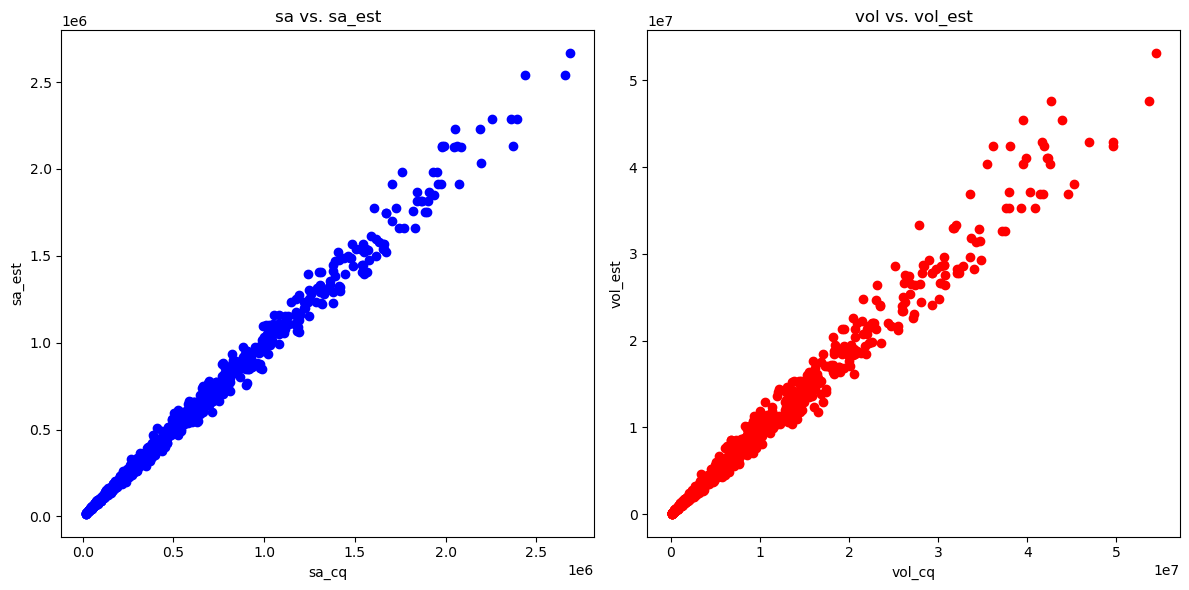

In [52]:
# plot scatter plots
# Create a figure and two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot on ax1
ax1.scatter(df['sa'], df['sa_est'], color='blue')
ax1.set_title('sa vs. sa_est')
ax1.set_xlabel('sa_cq')
ax1.set_ylabel('sa_est')
# Second scatter plot on ax2
ax2.scatter(df['vol'], df['vol_est'], color='red')
ax2.set_title('vol vs. vol_est')
ax2.set_xlabel('vol_cq')
ax2.set_ylabel('vol_est')
# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()

In [53]:
df.columns

Index(['id', 'a', 'c', 'f_r0', 'f_hp', 'f_h0', 'n_arms', 'sa', 'vol', 'sa_eff',
       'rho_eff', 'sa_est', 'vol_est'],
      dtype='object')

<Axes: >

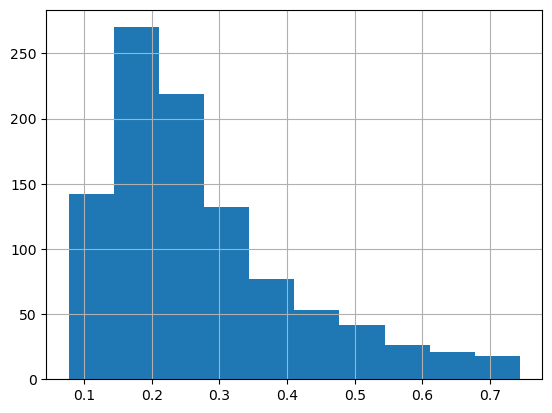

In [54]:
# plot distributions of effective volume and effective surface area (based on cadquery calcs)
df['sa_eff'].hist()

<Axes: >

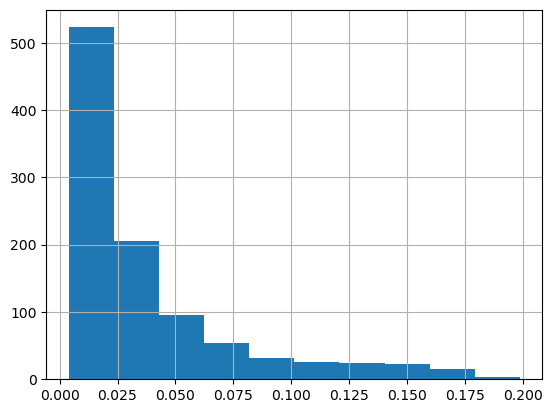

In [55]:
df['rho_eff'].hist()